In [1]:
# Import necessary libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn import linear_model
from sklearn.model_selection import KFold
#from sklearn.cross_validation import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer


In [2]:
movies = pd.read_csv("Training sheet.csv")

In [3]:
movies_df = pd.DataFrame(movies)
movies_df.head()

id                                           name  \
0    7950115                                         Avatar   
1   50950115  Harry Potter and the Deathly Hallows: Part II   
2  119870115                                 Transformers 3   
3  119590115                                    Toy Story 3   
4   91700115                     Pirates of the Caribbean 4   

                                    display_name  production_year  \
0                                         Avatar             2009   
1  Harry Potter and the Deathly Hallows: Part II             2011   
2                 Transformers: Dark of the Moon             2011   
3                                    Toy Story 3             2010   
4    Pirates of the Caribbean: On Stranger Tides             2011   

   movie_sequel    creative_type                             source  \
0             0  Science Fiction                Original Screenplay   
1             1          Fantasy  Based on Fiction Book/Short Story   
2             1  Science Fiction                        Based on TV   
3             1     Kids Fiction                Original Screenplay   
4             1          Fantasy           Based on Theme Park Ride   

       production_method      genre language  \
0  Animation/Live Action     Action  English   
1  Animation/Live Action  Adventure  English   
2  Animation/Live Action     Action  English   
3      Digital Animation  Adventure  English   
4            Live Action  Adventure  English   

                                 board_rating_reason  \
0  For intense epic battle sequences and warfare,...   
1  for some sequences of intense action violence ...   
2  for intense prolonged sequences of sci-fi acti...   
3                                            General   
4  for intense sequences of action/adventure viol...   

  movie_board_rating_display_name movie_release_pattern_display_name  total  \
0                           PG-13                               Wide   2784   
1                           PG-13                               Wide   1328   
2                           PG-13                               Wide   1124   
3                               G                               Wide   1064   
4                           PG-13                               Wide   1044   

   Category  
0         9  
1         9  
2         9  
3         9  
4         9

In [4]:
movies_df.columns

Index(['id', 'name', 'display_name', 'production_year', 'movie_sequel',
       'creative_type', 'source', 'production_method', 'genre', 'language',
       'board_rating_reason', 'movie_board_rating_display_name',
       'movie_release_pattern_display_name', 'total', 'Category'],
      dtype='object')

In [11]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace("/", ""))
        else:
            if isinstance(x, str):
                return str.lower(x.replace(",", ""))
            else:
                return ''

In [12]:
features = ['name', 'display_name', 'creative_type', 'source', 'production_method', 'genre', 'language',
            'board_rating_reason', 'movie_board_rating_display_name', 'movie_release_pattern_display_name']
# for feature in features:
#     movies_df[feature] = movies_df[feature].apply(literal_eval)
    
for feature in features:
    movies_df[feature] = movies_df[feature].apply(clean_data)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from math import sqrt
import seaborn as sns

In [14]:
# target = movies_df['Category']
# movies_df = movies_df.drop('Category', axis = 1)
movies_df.keys()

Index(['id', 'name', 'display_name', 'production_year', 'movie_sequel',
       'creative_type', 'source', 'production_method', 'genre', 'language',
       'board_rating_reason', 'movie_board_rating_display_name',
       'movie_release_pattern_display_name', 'total', 'Category'],
      dtype='object')

In [15]:
X = movies_df[['creative_type', 'source', 'production_method', 'genre', 'language',
               'board_rating_reason', 'movie_board_rating_display_name']]
y = movies_df["Category"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1196, 7) (1196, 1)


In [16]:
X.head()

creative_type                            source     production_method  \
0  science fiction               original screenplay  animationlive action   
1          fantasy  based on fiction bookshort story  animationlive action   
2  science fiction                       based on tv  animationlive action   
3     kids fiction               original screenplay     digital animation   
4          fantasy          based on theme park ride           live action   

       genre language                                board_rating_reason  \
0     action  english  for intense epic battle sequences and warfare,...   
1  adventure  english  for some sequences of intense action violence ...   
2     action  english  for intense prolonged sequences of sci-fi acti...   
3  adventure  english                                            general   
4  adventure  english  for intense sequences of actionadventure viole...   

  movie_board_rating_display_name  
0                           pg-13  
1                           pg-13  
2                           pg-13  
3                               g  
4                           pg-13

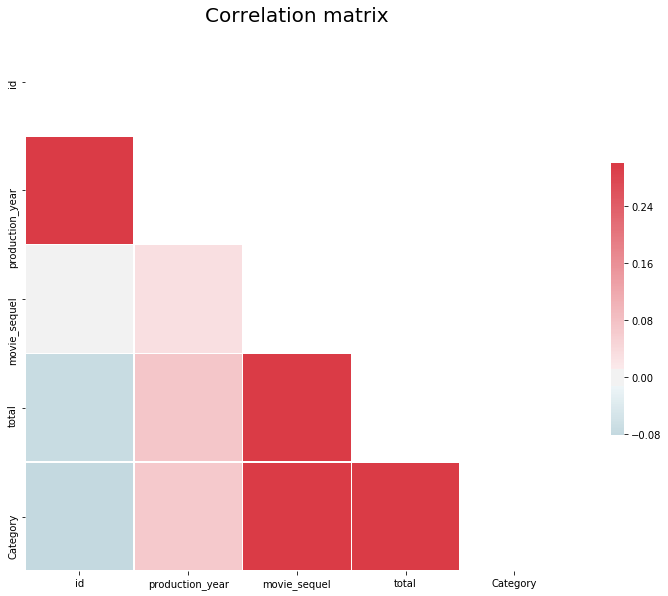

In [17]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))
# Compute the correlation matrix
corr = movies_df.corr()
#print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation matrix', 
          fontsize = 20)
plt.show()

In [18]:
# remove spaces from the 'creative_type', 'source', 'production_method', 'genre', 'language', 'board_rating_reason', 'movie_board_rating_display_name', 'movie_release_pattern_display_name'
X.creative_type = X.creative_type.map(lambda x: x.strip())
X.source = X.source.map(lambda x: x.strip())
X.production_method = X.production_method.map(lambda x: x.strip())
X.genre = X.genre.map(lambda x: x.strip())
X.language = X.language.map(lambda x: x.strip())
X.board_rating_reason = X.board_rating_reason.map(lambda x: x.strip())
X.movie_board_rating_display_name = X.movie_board_rating_display_name.map(lambda x: x.strip())

C:\Users\dinot\AppData\Local\conda\conda\envs\pythondata\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [19]:
movies_df = movies_df.drop(columns=['id'])

In [20]:
X_2 = pd.get_dummies(data=X)

In [21]:
X_2.head()

creative_type_contemporary fiction  creative_type_dramatization  \
0                                   0                            0   
1                                   0                            0   
2                                   0                            0   
3                                   0                            0   
4                                   0                            0   

   creative_type_factual  creative_type_fantasy  \
0                      0                      0   
1                      0                      1   
2                      0                      0   
3                      0                      0   
4                      0                      1   

   creative_type_historical fiction  creative_type_kids fiction  \
0                                 0                           0   
1                                 0                           0   
2                                 0                           0   
3                                 0                           1   
4                                 0                           0   

   creative_type_multiple creative types  creative_type_science fiction  \
0                                      0                              1   
1                                      0                              0   
2                                      0                              1   
3                                      0                              0   
4                                      0                              0   

   creative_type_super hero  source_based on comicgraphic novel  \
0                         0                                   0   
1                         0                                   0   
2                         0                                   0   
3                         0                                   0   
4                         0                                   0   

                 ...                  \
0                ...                   
1                ...                   
2                ...                   
3                ...                   
4                ...                   

   board_rating_reason_on appeal for sequences of terror and violence, and some sensuality (originally r)  \
0                                                  0                                                        
1                                                  0                                                        
2                                                  0                                                        
3                                                  0                                                        
4                                                  0                                                        

   board_rating_reason_or brief mild thematic elements, language and some crude humor  \
0                                                  0                                    
1                                                  0                                    
2                                                  0                                    
3                                                  0                                    
4                                                  0                                    

   board_rating_reason_or some violence and sexual content.  \
0                                                  0          
1                                                  0          
2                                                  0          
3                                                  0          
4                                                  0          

   board_rating_reason_or thematic elements and language.  \
0                                                  0        
1                                                  0        
2                        

In [22]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2, y, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

tvect = TfidfVectorizer(min_df=1, max_df=1)

X_t = tvect.fit_transform(X_2)
print(X_t)

  (0, 32)	1.0
  (1, 33)	1.0
  (2, 34)	1.0
  (3, 35)	1.0
  (4, 36)	1.0
  (5, 37)	1.0
  (6, 38)	0.5773502691896257
  (6, 31)	0.5773502691896257
  (6, 181)	0.5773502691896257
  (7, 39)	1.0
  (8, 40)	0.7071067811865476
  (8, 83)	0.7071067811865476
  (9, 29)	0.7071067811865476
  (9, 122)	0.7071067811865476
  (10, 58)	0.7071067811865476
  (10, 16)	0.7071067811865476
  (11, 17)	0.7071067811865476
  (11, 167)	0.7071067811865476
  (12, 63)	0.7071067811865476
  (12, 173)	0.7071067811865476
  (13, 65)	1.0
  (14, 121)	0.5773502691896257
  (14, 126)	0.5773502691896257
  (14, 125)	0.5773502691896257
  (15, 130)	1.0
  :	:
  (949, 161)	1.0
  (953, 115)	1.0
  (954, 140)	0.7071067811865476
  (954, 52)	0.7071067811865476
  (965, 178)	1.0
  (970, 28)	1.0
  (985, 156)	1.0
  (988, 41)	1.0
  (1000, 85)	1.0
  (1014, 154)	1.0
  (1030, 131)	1.0
  (1037, 129)	1.0
  (1040, 183)	1.0
  (1042, 186)	1.0
  (1043, 12)	1.0
  (1044, 13)	0.5
  (1044, 177)	0.5
  (1044, 10)	0.5
  (1044, 54)	0.5
  (1045, 14)	1.0
  (1049, 117

In [80]:
#Fit the model
y_train = y_train.ravel()
classifier.fit(X_train, y_train)

print(y_train.shape)

(897,)


In [26]:
#Validate Model using test data
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7603121516164995
Testing Data Score: 0.26755852842809363


In [29]:
# Make predictions with the hypertuned model
predictions = classifier.predict(X_test)

In [30]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=['9', '8', '7', '6', '5', '4', '3', '2', '1']))

             precision    recall  f1-score   support

          9       0.72      0.74      0.73        42
          8       0.64      0.77      0.70        62
          7       0.58      0.70      0.64        61
          6       0.69      0.75      0.72        51
          5       0.77      0.52      0.62        33
          4       0.86      0.30      0.44        20
          3       0.80      0.27      0.40        15
          2       0.36      0.50      0.42        10
          1       0.75      0.60      0.67         5

avg / total       0.68      0.65      0.64       299



In [32]:
def precision(y_true, y_pred):
    i = set(y_true).intersection(y_pred)
    len1 = len(y_pred)
    if len1 == 0:
        return 0
    else:
        return len(i) / len1


def recall(y_true, y_pred):
    i = set(y_true).intersection(y_pred)
    return len(i) / len(y_true)


def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    if p + r == 0:
        return 0
    else:
        return 2 * (p * r) / (p + r)


if __name__ == '__main__':
    print(f1(['A', 'B', 'C'], ['A', 'B']))

0.8


In [33]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(y_test, predictions))

Variance score: 0.43


In [37]:
logistics_classification = classifier.predict(X_test)
logistic_labels=[]
j=0
for i in logistics_classification:
    logistic_labels.append([i,y[j]])
    j+=1
logistic_labels
testdf=pd.DataFrame(logistic_labels)
testdf=testdf.rename(columns={0: 'Class', 1: 'Category'})
testdf=testdf.sort_values('Class', ascending=True)
testdf=testdf.set_index("Class")

In [40]:
classes_movies = classifier.classes_
# labels = classifier.labels_
print(classes_movies)

[1 2 3 4 5 6 7 8 9]


In [41]:
testdf.to_csv("Training_Logistic_prediction.csv")

In [42]:
test=X_2[:1]

test

creative_type_contemporary fiction  creative_type_dramatization  \
0                                   0                            0   

   creative_type_factual  creative_type_fantasy  \
0                      0                      0   

   creative_type_historical fiction  creative_type_kids fiction  \
0                                 0                           0   

   creative_type_multiple creative types  creative_type_science fiction  \
0                                      0                              1   

   creative_type_super hero  source_based on comicgraphic novel  \
0                         0                                   0   

                 ...                  \
0                ...                   

   board_rating_reason_on appeal for sequences of terror and violence, and some sensuality (originally r)  \
0                                                  0                                                        

   board_rating_reason_or brief mild thematic elements, language and some crude humor  \
0                                                  0                                    

   board_rating_reason_or some violence and sexual content.  \
0                                                  0          

   board_rating_reason_or thematic elements and language.  \
0                                                  0        

   movie_board_rating_display_name_g  movie_board_rating_display_name_nc-17  \
0                                  0                                      0   

   movie_board_rating_display_name_not rated  \
0                                          0   

   movie_board_rating_display_name_pg  movie_board_rating_display_name_pg-13  \
0                                   0                                      1   

   movie_board_rating_display_name_r  
0                                  0  

[1 rows x 1055 columns]

In [43]:
classifier.predict(test)

array([9], dtype=int64)

In [47]:
classifier.score(X_2, y, sample_weight=None)

0.637123745819398

In [67]:
import pickle
filename = 'logistic_movies_cluster.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [68]:
scoring = pd.read_csv("Scoring Sheet.csv")
scoring.head()

id                                    name  \
0    7970115                    Avengers, The (2011)   
1  174540115                   Dark Knight Rises The   
2  149080115                                 Bond 23   
3  136020115  Twilight Saga Breaking Dawn Part 2 The   
4   53500115                             Hobbit, The   

                               display_name  production_budget  \
0                     Marvel's The Avengers          225000000   
1                     The Dark Knight Rises                  0   
2                                   Skyfall          200000000   
3  The Twilight Saga: Breaking Dawn, Part 2          136200000   
4         The Hobbit: An Unexpected Journey          270000000   

   production_year  movie_sequel         creative_type  \
0             2012             0            Super Hero   
1             2012             1            Super Hero   
2             2012             1  Contemporary Fiction   
3             2012             1               Fantasy   
4             2012             1               Fantasy   

                              source      production_method      genre  \
0       Based on Comic/Graphic Novel            Live Action  Adventure   
1       Based on Comic/Graphic Novel            Live Action     Action   
2  Based on Fiction Book/Short Story            Live Action     Action   
3  Based on Fiction Book/Short Story            Live Action      Drama   
4  Based on Fiction Book/Short Story  Animation/Live Action  Adventure   

  language                                board_rating_reason  \
0  English  for intense sequences of sci-fi violence and a...   
1  English  for intense sequences of violence and action, ...   
2  English  for intense violent sequences throughout, some...   
3  English  for sequences of violence including disturbing...   
4  English  for extended sequences of intense fantasy acti...   

  movie_board_rating_display_name movie_release_pattern_display_name  
0                           PG-13                               Wide  
1                           PG-13                               Wide  
2                           PG-13                               Wide  
3                           PG-13                               Wide  
4                           PG-13                               Wide

In [69]:
cols = ['creative_type', 'source', 'production_method', 'genre', 'language',
               'board_rating_reason', 'movie_board_rating_display_name']
# for feature in features:
#     movies_df[feature] = movies_df[feature].apply(literal_eval)
    
for col in cols:
    scoring[col] = scoring[col].apply(clean_data)

In [70]:
scoredf = scoring[['creative_type', 'source', 'production_method', 'genre', 'language',
               'board_rating_reason', 'movie_board_rating_display_name']]
scoredf.head()

creative_type                            source  \
0            super hero       based on comicgraphic novel   
1            super hero       based on comicgraphic novel   
2  contemporary fiction  based on fiction bookshort story   
3               fantasy  based on fiction bookshort story   
4               fantasy  based on fiction bookshort story   

      production_method      genre language  \
0           live action  adventure  english   
1           live action     action  english   
2           live action     action  english   
3           live action      drama  english   
4  animationlive action  adventure  english   

                                 board_rating_reason  \
0  for intense sequences of sci-fi violence and a...   
1  for intense sequences of violence and action, ...   
2  for intense violent sequences throughout, some...   
3  for sequences of violence including disturbing...   
4  for extended sequences of intense fantasy acti...   

  movie_board_rating_display_name  
0                           pg-13  
1                           pg-13  
2                           pg-13  
3                           pg-13  
4                           pg-13

In [71]:
# remove spaces from the 'creative_type', 'source', 'production_method', 'genre', 'language', 'board_rating_reason', 'movie_board_rating_display_name', 'movie_release_pattern_display_name'
scoredf.creative_type = scoredf.creative_type.map(lambda x: x.strip())
scoredf.source = scoredf.source.map(lambda x: x.strip())
scoredf.production_method = scoredf.production_method.map(lambda x: x.strip())
scoredf.genre = scoredf.genre.map(lambda x: x.strip())
scoredf.language = scoredf.language.map(lambda x: x.strip())
scoredf.board_rating_reason = scoredf.board_rating_reason.map(lambda x: x.strip())
scoredf.movie_board_rating_display_name = scoredf.movie_board_rating_display_name.map(lambda x: x.strip())

C:\Users\dinot\AppData\Local\conda\conda\envs\pythondata\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [72]:
X_3 = pd.get_dummies(data=scoredf)

In [73]:
X_3.head()

creative_type_contemporary fiction  creative_type_dramatization  \
0                                   0                            0   
1                                   0                            0   
2                                   1                            0   
3                                   0                            0   
4                                   0                            0   

   creative_type_factual  creative_type_fantasy  \
0                      0                      0   
1                      0                      0   
2                      0                      0   
3                      0                      1   
4                      0                      1   

   creative_type_historical fiction  creative_type_kids fiction  \
0                                 0                           0   
1                                 0                           0   
2                                 0                           0   
3                                 0                           0   
4                                 0                           0   

   creative_type_science fiction  creative_type_super hero  \
0                              0                         1   
1                              0                         1   
2                              0                         0   
3                              0                         0   
4                              0                         0   

   source_based on comicgraphic novel  source_based on factual bookarticle  \
0                                   1                                    0   
1                                   1                                    0   
2                                   0                                    0   
3                                   0                                    0   
4                                   0                                    0   

                 ...                  \
0                ...                   
1                ...                   
2                ...                   
3                ...                   
4                ...                   

   board_rating_reason_for violence, language and some drug material.  \
0                                                  0                    
1                                                  0                    
2                                                  0                    
3                                                  0                    
4                                                  0                    

   board_rating_reason_for violence, sexual references pervasive language, and some drug use.  \
0                                                  0                                            
1                                                  0                                            
2                                                  0                                            
3                                                  0                                            
4                                                  0                                            

   board_rating_reason_for war violence and some disturbing images.  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   board_rating_reason_general  \
0                            0   
1                            0   
2                            0   
3                            0   
4                            0   

   board_rating_reason_international - to be excluded  \
0                                                  0    
1                    

In [88]:
X_test = X_t.fit_transform(scoredf)
# X_test=tvect.transform(X_3)
# classifier.predict(X_test[:1])
print(X_test)

AttributeError: fit_transform not found

In [74]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_3)
print("The test data belongs to Class: ", result)
df=scoredf.loc[scoredf.index==result[0]]

ValueError: X has 119 features per sample; expecting 1055